In [47]:
%matplotlib inline

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
import csv

In [54]:
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]
sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

In [84]:
# Ignore unmasked for now
# for row in rows:
#     del row[3]

dens = np.array(rows)

,xy
0,1
1,1
2,2
3,1
4,1
5,1
6,1
7,1
8,1
9,3


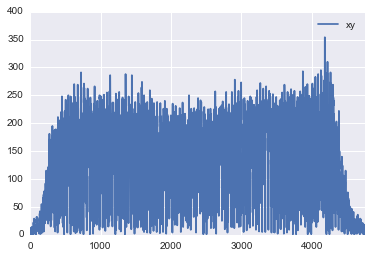

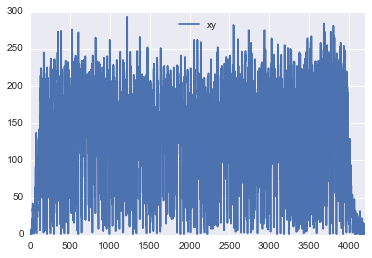

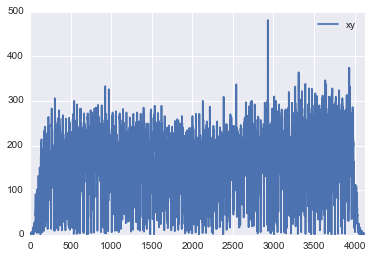

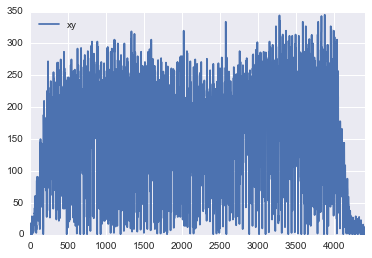

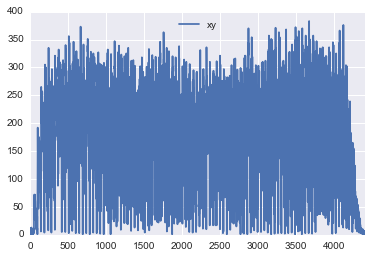

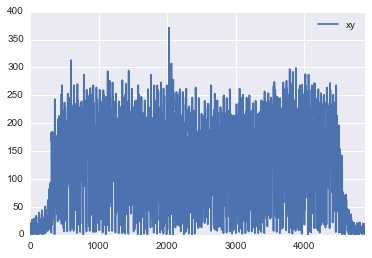

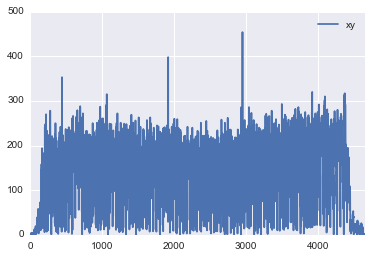

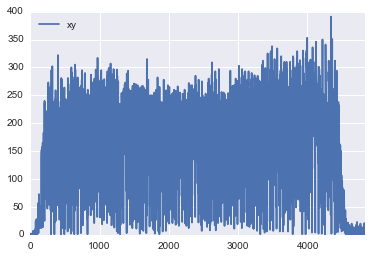

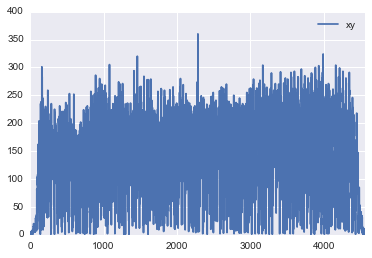

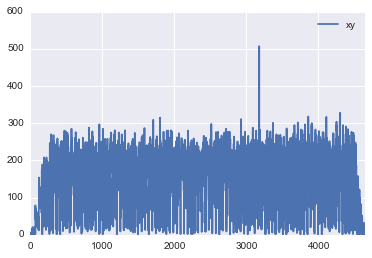

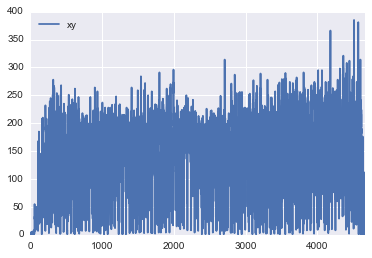

In [94]:
count = 0
for i in sorted_z:
    unmaskedSynapsesNoZero = ([r[-1] for r in rows if r[-2] != 0 if r[-1] !=0 if r[2] == i])
    # convert to pandas dataframe
    df = pd.DataFrame(unmaskedSynapsesNoZero, columns=['xy'])
    df.plot()
    count = count + 1
    
df
    
#     syn_den = sns.load_dataset(df)

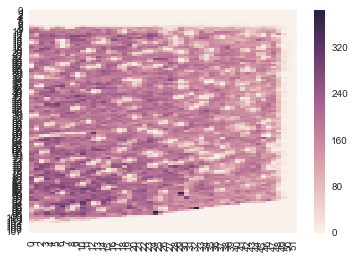

In [103]:
real_volume = np.zeros((len(sorted_x), len(sorted_y), len(sorted_z)))
for r in rows:
    real_volume[sorted_x.index(r[0]), sorted_y.index(r[1]), sorted_z.index(r[2])] = r[-1]

count = 0
for i in sorted_z:
    df = pd.DataFrame(real_volume[:,:,count])
#     print real_volume[:,:,count]
#     ax = sns.heatmap(df)
    count = count + 1
    
ax = sns.heatmap(df)
    
#     syn_den = sns.load_dataset(df)
    

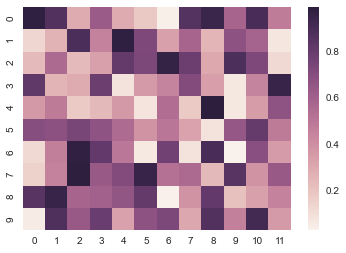

In [102]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)